In [2]:
import pvlib
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter

#from pandas import datetools




# Set time period

In [3]:
YEAR = 2013
STARTDATE = '%d-01-01T00:00:00' % YEAR
ENDDATE = '%d-12-31T23:59:59' % YEAR
TIMES_Min = pd.date_range(start=STARTDATE, end=ENDDATE, freq='30min')
TIMES_H = pd.date_range(start=STARTDATE, end=ENDDATE, freq='H')

# Build PV system


In [4]:
# Select PV module and inverter 
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Schott_Solar_ASE_250_DGF_50__250___2007__E__']
inverter = cec_inverters['ABB__PVI_3_0_OUTD_S_US__208V_']

In [5]:
location = Location(latitude=51.469, longitude=-0.105, tz='Europe/London', altitude=26, name='Elmore House')

temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=35, surface_azimuth=150, module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters, modules_per_string=4, strings_per_inverter=1)


# Get poa data for 2020 (366 days) half hourly


In [6]:

poa_data_2020, meta, inputs = pvlib.iotools.get_pvgis_hourly(51.469, -0.105, start=2013, end=2013, raddatabase="PVGIS-SARAH2", components=True, surface_tilt=35,\
            surface_azimuth=-30, outputformat='json', usehorizon=True, userhorizon=None, pvcalculation=False, \
peakpower=None, pvtechchoice='crystSi', mountingplace='free', loss=0, trackingtype=0, optimal_surface_tilt=False,\
            optimalangles=False, url='https://re.jrc.ec.europa.eu/api/v5_2/', map_variables=True, timeout=30)


poa_data_2020["poa_diffuse"] = poa_data_2020["poa_sky_diffuse"] + poa_data_2020["poa_ground_diffuse"]
poa_data_2020["poa_global"] = poa_data_2020["poa_diffuse"] + poa_data_2020["poa_direct"]

In [7]:
poa_data_2020.index = TIMES_H
poa_data_2020

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,poa_diffuse,poa_global
2013-01-01 00:00:00,0.0,0.0,0.0,0.0,8.47,4.07,0,0.0,0.0
2013-01-01 01:00:00,0.0,0.0,0.0,0.0,8.15,4.34,0,0.0,0.0
2013-01-01 02:00:00,0.0,0.0,0.0,0.0,7.40,4.21,0,0.0,0.0
2013-01-01 03:00:00,0.0,0.0,0.0,0.0,6.70,4.07,0,0.0,0.0
2013-01-01 04:00:00,0.0,0.0,0.0,0.0,5.83,3.38,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,0.0,0.0,0.0,0.0,5.78,4.14,0,0.0,0.0
2013-12-31 20:00:00,0.0,0.0,0.0,0.0,5.69,4.14,0,0.0,0.0
2013-12-31 21:00:00,0.0,0.0,0.0,0.0,5.77,4.41,0,0.0,0.0
2013-12-31 22:00:00,0.0,0.0,0.0,0.0,6.09,4.83,0,0.0,0.0


In [8]:
poa_data_2020_30min = poa_data_2020.resample('30T').interpolate()
poa_data_2020_30min


,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,poa_diffuse,poa_global
2013-01-01 00:00:00,0.0,0.0,0.0,0.0,8.470,4.070,0.0,0.0,0.0
2013-01-01 00:30:00,0.0,0.0,0.0,0.0,8.310,4.205,0.0,0.0,0.0
2013-01-01 01:00:00,0.0,0.0,0.0,0.0,8.150,4.340,0.0,0.0,0.0
2013-01-01 01:30:00,0.0,0.0,0.0,0.0,7.775,4.275,0.0,0.0,0.0
2013-01-01 02:00:00,0.0,0.0,0.0,0.0,7.400,4.210,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2013-12-31 21:00:00,0.0,0.0,0.0,0.0,5.770,4.410,0.0,0.0,0.0
2013-12-31 21:30:00,0.0,0.0,0.0,0.0,5.930,4.620,0.0,0.0,0.0
2013-12-31 22:00:00,0.0,0.0,0.0,0.0,6.090,4.830,0.0,0.0,0.0
2013-12-31 22:30:00,0.0,0.0,0.0,0.0,6.195,5.035,0.0,0.0,0.0


# Build PV system with 30 min data

In [9]:
modelchain = ModelChain(system, location)

modelchain.run_model_from_poa(poa_data_2020_30min)


ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(0, -2000.0, '−2000'),
  Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000')])

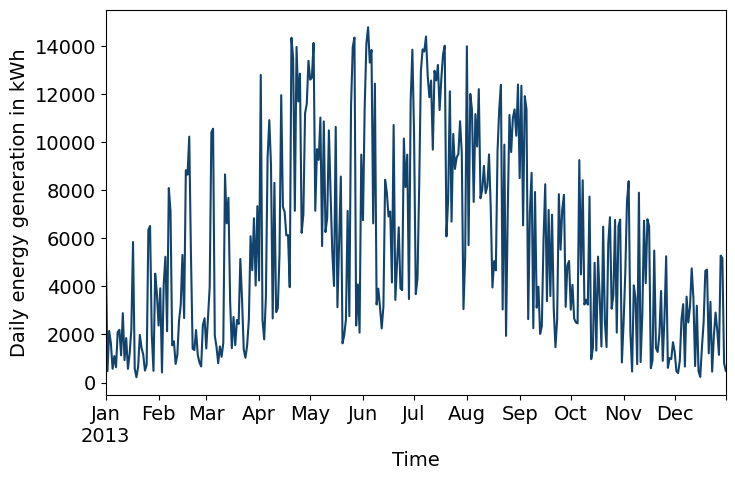

In [11]:
sum_30_min_data = modelchain.results.ac.sum()

In [12]:
sum_30_min_data

2057274.3591273404

In [13]:
pv_output_2013 = pd.DataFrame(modelchain.results.ac, columns= ["kWh/hh"])
# divided by 2 to account for half hourly data and multiplied by 37 to receive 37kWp output
# divided by 1000 to receive kWh
pv_output_2013["kWh/hh"] = pv_output_2013["kWh/hh"]/2*37/1000 
pv_output_2013[pv_output_2013 < 0] = 0

In [14]:
pv_output_2013.index.name = 'DateTime'
pv_output_2013

,kWh/hh
DateTime,
2013-01-01 00:00:00,0.0
2013-01-01 00:30:00,0.0
2013-01-01 01:00:00,0.0
2013-01-01 01:30:00,0.0
2013-01-01 02:00:00,0.0
...,...
2013-12-31 21:00:00,0.0
2013-12-31 21:30:00,0.0
2013-12-31 22:00:00,0.0


In [23]:
pv_output_2013.resample("D")


kWh/hh    38077.187644
dtype: float64

NameError: name 'legend' is not defined

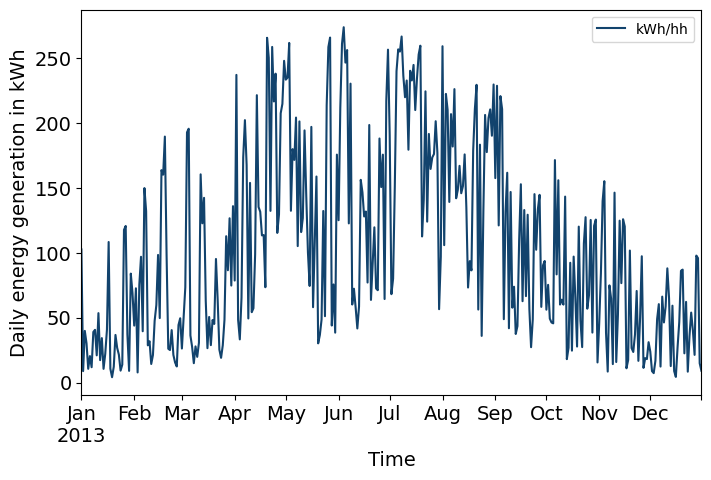

In [26]:

#fig, ax = plt.subplots(figsize=(8,5))
blue = '#12436D'  # pool energy

pv_output_2013.resample("D").sum().plot(color=blue, figsize=(8,5))

plt.ylabel('Daily energy generation in kWh', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.minorticks_off() # turns off minor ticks


plt.xticks(fontsize=14)
plt.yticks(fontsize=14) 
legend.remove()


In [15]:
pv_output_2013.to_csv("pv_output_2013_37kWp.csv")
